### Author: Adriano M. Yoshino - amy324@nyu.edu

### IDEA: Customers are less likely than Subscribers to choose biking on weekdays

### NULL HYPOTHESIS: The ratio of Subscribers biking on weekends over Subscribers biking on weekdays is the same or higher than the ratio of Customers biking over weekends to Customers biking on weekdays

- H0 = Cust_wend/Cust_wdays <= Subs_wend/Subs_wdays
- H1 = Cust_wend/Cust_wdays > Subs_wend/Subs_wdays

In [1]:
# Code inspired on Dr. Bianco instructions. Some parts were copied to make this homework happen.

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")



Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/amy324/PUIdata'

In [3]:
# Function obtained from Dr. Bianco example
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUI2016") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [7]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
datestring = '201503'
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [4]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [5]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', u'gender'], axis=1, inplace=True)

In [6]:
set(df.usertype)

{'Customer', 'Subscriber'}

In [7]:
df.head()

,usertype,date
0,Subscriber,2015-03-01 00:00:00
1,Subscriber,2015-03-01 00:01:00
2,Customer,2015-03-01 00:01:00
3,Subscriber,2015-03-01 00:02:00
4,Subscriber,2015-03-01 00:02:00


In [8]:
# Lets make Customer = 0, Subscriber  = 1
df.usertype = df.usertype.replace('Customer', 0)
df.usertype = df.usertype.replace('Subscriber', 1)
df.head()

,usertype,date
0,1,2015-03-01 00:00:00
1,1,2015-03-01 00:01:00
2,0,2015-03-01 00:01:00
3,1,2015-03-01 00:02:00
4,1,2015-03-01 00:02:00


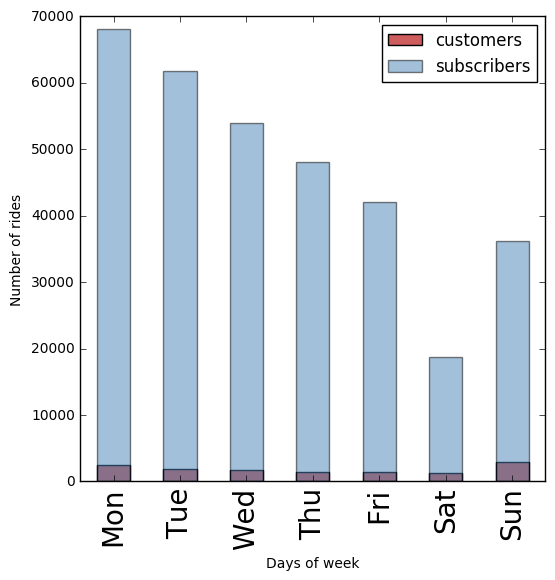

In [10]:
# Code obtained from Dr. Bianco model
fig = pl.figure(figsize(6,6))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_c = 1
((df['date'][df['usertype'] == 0].groupby([df['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='customers')

norm_s = 1
ax = ((df['date'][df['usertype'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='subscribers')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()
pl.xlabel('Days of week')
pl.ylabel('Number of rides')

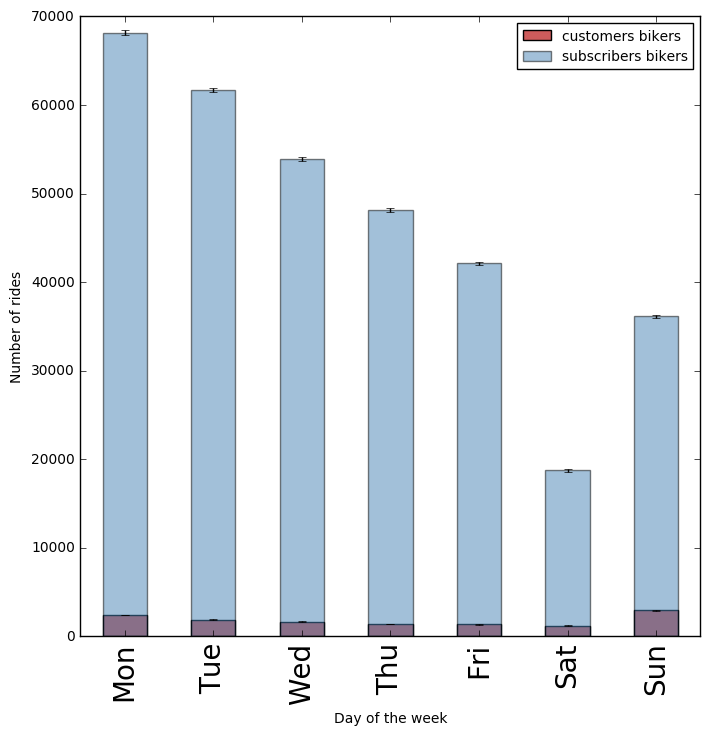

In [24]:
# Calculating errors
fig=pl.figure(figsize(8,8))

counts_c = df.date[df.usertype == 0].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='customers bikers')


counts_s = df.date[df.usertype==1].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='subscribers bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['customers bikers','subscribers bikers'],fontsize=10)

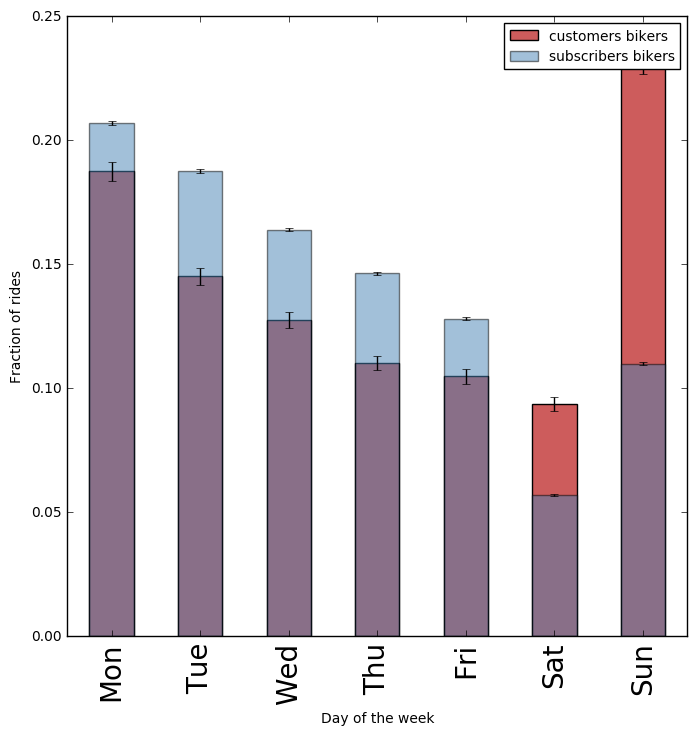

In [29]:
fig = pl.figure(figsize(8,8))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='Customers bikers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='subscribers bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['customers bikers','subscribers bikers'],fontsize=10)

### Visually we can infer that the ratio of Customers bikers on weekends are much greater than the ratio of subscribers bikers, as we have supposed in the beggining of this study.

### Lets try Z-test

In [45]:
df['weekend'] = df.date.dt.weekday == (0 or 1)
df['weekday'] = df.date.dt.weekday != (0 or 1)

In [53]:
df.weekday = df.weekday.replace(False, 0)
df.weekday = df.weekday.replace(True, 1)
df.weekend = df.weekend.replace(False, 0)
df.weekend = df.weekend.replace(True, 1)

In [54]:
df.head()

,usertype,date,weekend,weekday
0,1,2015-03-01 00:00:00,False,True
1,1,2015-03-01 00:01:00,False,True
2,0,2015-03-01 00:01:00,False,True
3,1,2015-03-01 00:02:00,False,True
4,1,2015-03-01 00:02:00,False,True


In [12]:
df_wkd = pd.DataFrame()
df_week = pd.DataFrame()

In [28]:
df_wend_c = df[(df['usertype']==0) & (df.date.dt.weekday == (0 or 1))]
df_wend_s = df[(df['usertype']==1) & (df.date.dt.weekday == (0 or 1))]

df_week_c = df[(df['usertype']==0) & (df.date.dt.weekday != (0 or 1))]
df_week_s = df[(df['usertype']==1) & (df.date.dt.weekday != (0 or 1))]

In [29]:
df_wend_c.head()

,usertype,date
10215,0,2015-03-03 01:36:00
10220,0,2015-03-03 01:53:00
10238,0,2015-03-03 02:43:00
10239,0,2015-03-03 02:47:00
10883,0,2015-03-03 07:28:00


In [31]:
df_week_c.head()

,usertype,date
2,0,2015-03-01 00:01:00
41,0,2015-03-01 00:24:00
53,0,2015-03-01 00:30:00
120,0,2015-03-01 01:10:00
125,0,2015-03-01 01:12:00


In [35]:
ratio_weekend = df_wend_c.count() / df_wend_s.count()
ratio_weekday = df_week_c.count() / df_week_s.count()

In [71]:
ratio_weekend = df_wend_c.count() / df_wend_s.count()
ratio_weekday = df_week_c.count() / df_week_s.count()

In [73]:
ratio_weekday.mean()

0.041107115729290225

In [65]:
ratio_weekend.mean()

0.030216130391108518

In [59]:
df.describe()

,usertype
count,341826.000000
mean,0.962405
std,0.190215
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [63]:
df.std()

usertype    0.190215
weekend     0.389125
weekday     0.389125
dtype: float64

In [67]:
z_test = (ratio_weekend.mean()-ratio_weekday.mean())/(0.389125/len(df)**0.5)
print (z_test)

-16.3636652345


### for 16.36 P is 0.9998
### Then, p-value = 1-P = 0.0002
### p-value = 0.0002 < 0.05, so the Null Hypothesis is rejected